# Yorumlarının Pozitif, Negatif ve Nötr analizlerinin yapılması ve Modellenmesi

In [1]:
!pip install nltk

DEPRECATION: Loading egg at c:\users\telha\anaconda3\lib\site-packages\tortoise-2.8.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from textblob import TextBlob, Word

from nltk.stem.snowball import SnowballStemmer

from langdetect import detect

import seaborn as sns
import numpy as np
import scipy as sp

import nltk
from nltk.tokenize import sent_tokenize

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df=pd.read_csv('restaurant.csv')

In [4]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [5]:
df.shape

(10417, 10)

In [6]:
df['text']=df['text'].str.lower()
df['text']=df['text'].str.replace('[^\w\s]','')
df['text']=df['text'].str.replace('\d+','') 
df['text']=df['text'].str.replace('\n','').replace('\r','')

## Sentiment analysis

In [9]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [10]:
df.loc[(df['stars']==1)|(df['stars']==2),'sentiment']='negative'
df.loc[(df['stars']==3),'sentiment']='neutral'
df.loc[(df['stars']==4)|(df['stars']==5),'sentiment']='positive'

In [11]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,positive
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50,positive
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,positive
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,negative
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,positive


In [12]:
from langdetect import detect_langs
language = [detect_langs(i) for i in df.text]
languages = [str(i[0]).split(':')[0] for i in language]
df['language'] = languages

In [13]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment,language
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,positive,en
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50,positive,en
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,positive,en
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,negative,en
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,positive,en


<Axes: xlabel='language', ylabel='count'>

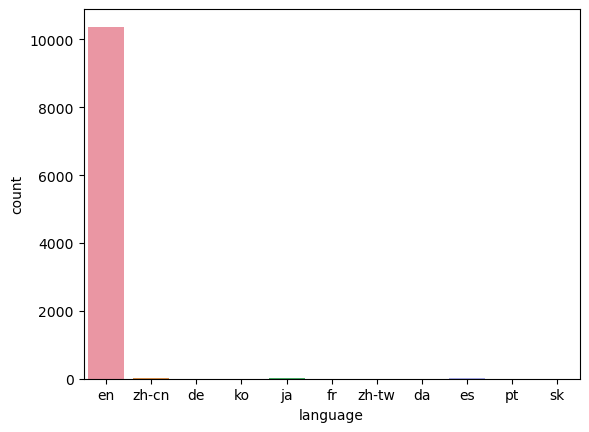

In [18]:
sns.countplot(x=df["language"])

In [14]:
df["language"].value_counts().sort_values(ascending=False)

en       10373
es          10
zh-cn        7
ja           7
ko           6
fr           5
de           4
da           2
sw           1
pt           1
sk           1
Name: language, dtype: int64

In [15]:
from langdetect import detect
df['language']=df['text'].apply(detect)
df=df[df['language']=='en']
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment,language
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,positive,en
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50,positive,en
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,positive,en
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,negative,en
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,positive,en
...,...,...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,best buffet ever irma was great served us bett...,2019-11-17 20:39:36,positive,en
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,hollllllyyyy moleyyyy this buffet was one for ...,2019-11-12 02:23:07,positive,en
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,the selection is amazing and all the food is e...,2019-12-12 03:27:22,positive,en
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,one of the best buffets ive had in vegas my on...,2019-11-01 21:00:51,positive,en


In [16]:
df["language"].value_counts().sort_values(ascending=False)

en    10373
Name: language, dtype: int64

In [17]:
df=df[df['language']=='en']
df.reset_index(drop=True,inplace=True)

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\telha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df=df[['stars','text','sentiment']]

In [20]:
df

,stars,text,sentiment
0,5,after getting food poisoning at the palms hote...,positive
1,4,a feast worthy of godsbaccarnal buffet in caes...,positive
2,4,the crab legs are better than the ones at wick...,positive
3,1,not worth it too salty food and expensive this...,negative
4,5,i would give this infinite stars if i could my...,positive
...,...,...,...
10368,5,best buffet ever irma was great served us bett...,positive
10369,4,hollllllyyyy moleyyyy this buffet was one for ...,positive
10370,5,the selection is amazing and all the food is e...,positive
10371,4,one of the best buffets ive had in vegas my on...,positive


In [21]:
df.stars.value_counts().sort_values(ascending=False)

5    4226
4    2626
3    1557
1    1051
2     913
Name: stars, dtype: int64

In [22]:
negative_data=df[df['sentiment']=="negative"]['text']
positive_data=df[df['sentiment']=="positive"]['text']
neutral_data=df[df['sentiment']=="neutral"]['text']

In [23]:
df.sentiment.value_counts().sort_values(ascending=False)

positive    6852
negative    1964
neutral     1557
Name: sentiment, dtype: int64

In [24]:
negative_data

3        not worth it too salty food and expensive this...
12       food is fine better than most buffets when i r...
29       so i come here on my birthday thinking its the...
33       be careful using the restroom here while i was...
42       what a money pit food was terrible and not lab...
                               ...                        
10346    i  have eaten here for the breakfast and lunch...
10350    in thanksgiving day i stayed in line for three...
10357    i went to the wicked spoon at cosmopolitan and...
10358    i am one disappointed buffetloving foodie we f...
10366    came him from la thanksgiving week we decided ...
Name: text, Length: 1964, dtype: object

In [25]:
iyivekotu=df[(df['stars']==5)| (df['stars']==1)]

In [26]:
iyivekotu.head(10)
#index aradan çıkanlardan dolayı bozulmuş oldu

,stars,text,sentiment
0,5,after getting food poisoning at the palms hote...,positive
3,1,not worth it too salty food and expensive this...,negative
4,5,i would give this infinite stars if i could my...,positive
5,5,really enjoyed everything they had to offer it...,positive
8,5,lots of choices good service line wasnt as lon...,positive
10,5,best buffet as of march beats wicked spoon an...,positive
11,5,we tried bacchanal for lunch on a wednesday in...,positive
12,1,food is fine better than most buffets when i r...,negative
13,5,amazing buffet went at ish on a thursday and b...,positive
14,5,if this is what heaven is like then im going t...,positive


In [27]:
iyivekotu

,stars,text,sentiment
0,5,after getting food poisoning at the palms hote...,positive
3,1,not worth it too salty food and expensive this...,negative
4,5,i would give this infinite stars if i could my...,positive
5,5,really enjoyed everything they had to offer it...,positive
8,5,lots of choices good service line wasnt as lon...,positive
...,...,...,...
10365,5,we went to bacchanal on easter sunday as it wa...,positive
10366,1,came him from la thanksgiving week we decided ...,negative
10367,5,every time we visit las vegas we go to this bu...,positive
10368,5,best buffet ever irma was great served us bett...,positive


In [28]:
iyivekotu.reset_index(drop=True,inplace=True)

In [29]:
iyivekotu.text[5]

'best buffet as of march  beats wicked spoon and othersaguas frescasstreet tacosthe desserts are amazing including the gelato sorbet and molten chocolate cake'

<AxesSubplot: xlabel='stars', ylabel='count'>

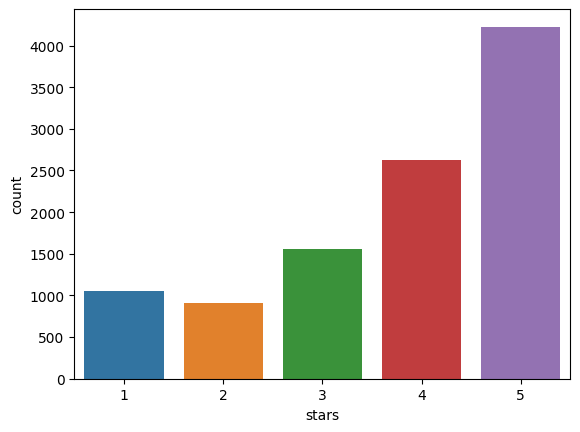

In [30]:
sns.countplot(x=df["stars"])

<AxesSubplot: xlabel='stars', ylabel='count'>

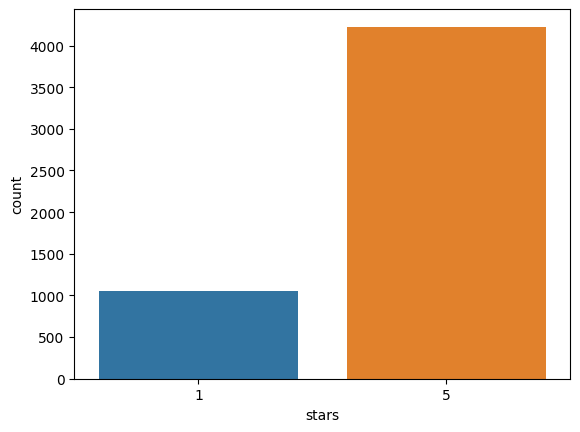

In [31]:
sns.countplot(x=iyivekotu["stars"])

In [32]:
x=iyivekotu["text"]
y=iyivekotu["stars"]

In [33]:
x[0]

'after getting food poisoning at the palms hotel i was scared to eat at any more buffets but we figured with the high price tag the positive reviews etc it was worth a chance im really glad we gave it a try btw i uploaded a collage of the things we atethe seafood line is by the far the longest i would not recommend showing up in heels if youre female my feet were killing me between the line at the door the line to get sat and the seafood line totally worth it thoughthe prime rib was the best ive ever hadi loved the sweet potato totsi even have phothe music was great and so was our server alma  he was a older gentleman with a mustache and was very attentive and delightfuli will return next trip in more comfortable shoes after a horrible visit at the palms with non stop issues in a matter of  hours your establishment was truly the high light of our trip thank you for an exquisite dinner'

In [34]:
vect=CountVectorizer(ngram_range=(1,2),stop_words='english')

In [35]:
x=vect.fit_transform(x)
#Vektörize edince Tokenize da etmiş oluyoruz

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [37]:
tf=pd.DataFrame(x_train.toarray(),columns=vect.get_feature_names_out())

In [54]:
lr=LogisticRegression()

In [55]:
model=lr.fit(x_train,y_train)

In [56]:
pred=lr.predict(x_test)

In [57]:
accuracy_score(pred,y_test)

0.9517045454545454